## Introduction

### Heartattack Predictions 

Student ID: IG74096

The dataset consists of 1025 rows and contains 14 columns. The goal is to predict the target variable.

### Importing Packages

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset

In [3]:
heart = pd.read_csv("heart.csv") 

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  disease   1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
heart.shape

(1025, 14)

In [7]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Pre-processing

In [8]:
# Check missing values
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
disease     0
dtype: int64

In [9]:
heart.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [10]:
pd.crosstab(heart.sex, heart.disease)

disease,0,1
sex,,
0,86,226
1,413,300


## Exploratory Data Analysis

In [12]:
heart.disease.value_counts()

1    526
0    499
Name: disease, dtype: int64

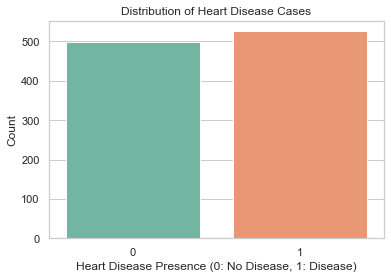

In [21]:
# Count the number of cases (presence of heart disease) and non-cases (0: No disease, 1: Disease)
case_counts = heart['disease'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
sns.barplot(x=case_counts.index, y=case_counts.values, palette="Set2")
plt.title("Distribution of Heart Disease Cases")
plt.xlabel("Heart Disease Presence (0: No Disease, 1: Disease)")
plt.ylabel("Count")
plt.show()

From above plot, there are 526 patients with heart disease cases and 499 patients with no heart disease

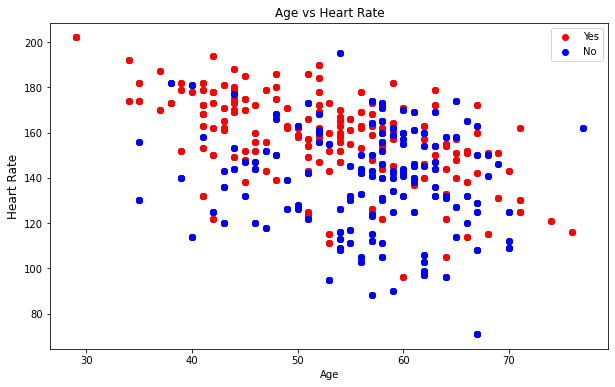

In [15]:
# Finding pattern using scatter plot
plt.figure(figsize=(10,6))
plt.scatter(heart.age[heart.disease==1],heart.thalach[heart.disease==1], c='red')
plt.scatter(heart.age[heart.disease==0],heart.thalach[heart.disease==0], c='blue')
plt.xlabel('Age', fontsize = 10)
plt.ylabel('Heart Rate', fontsize = 12)
plt.title('Age vs Heart Rate', fontsize = 12)
plt.legend(['Yes','No'], fontsize = 10);

The scatter plot suggests that age and maximum heart rate may have an association with heart disease.
It appears that as individuals age, those with heart disease tend to have lower maximum heart rates compared to those without heart disease.

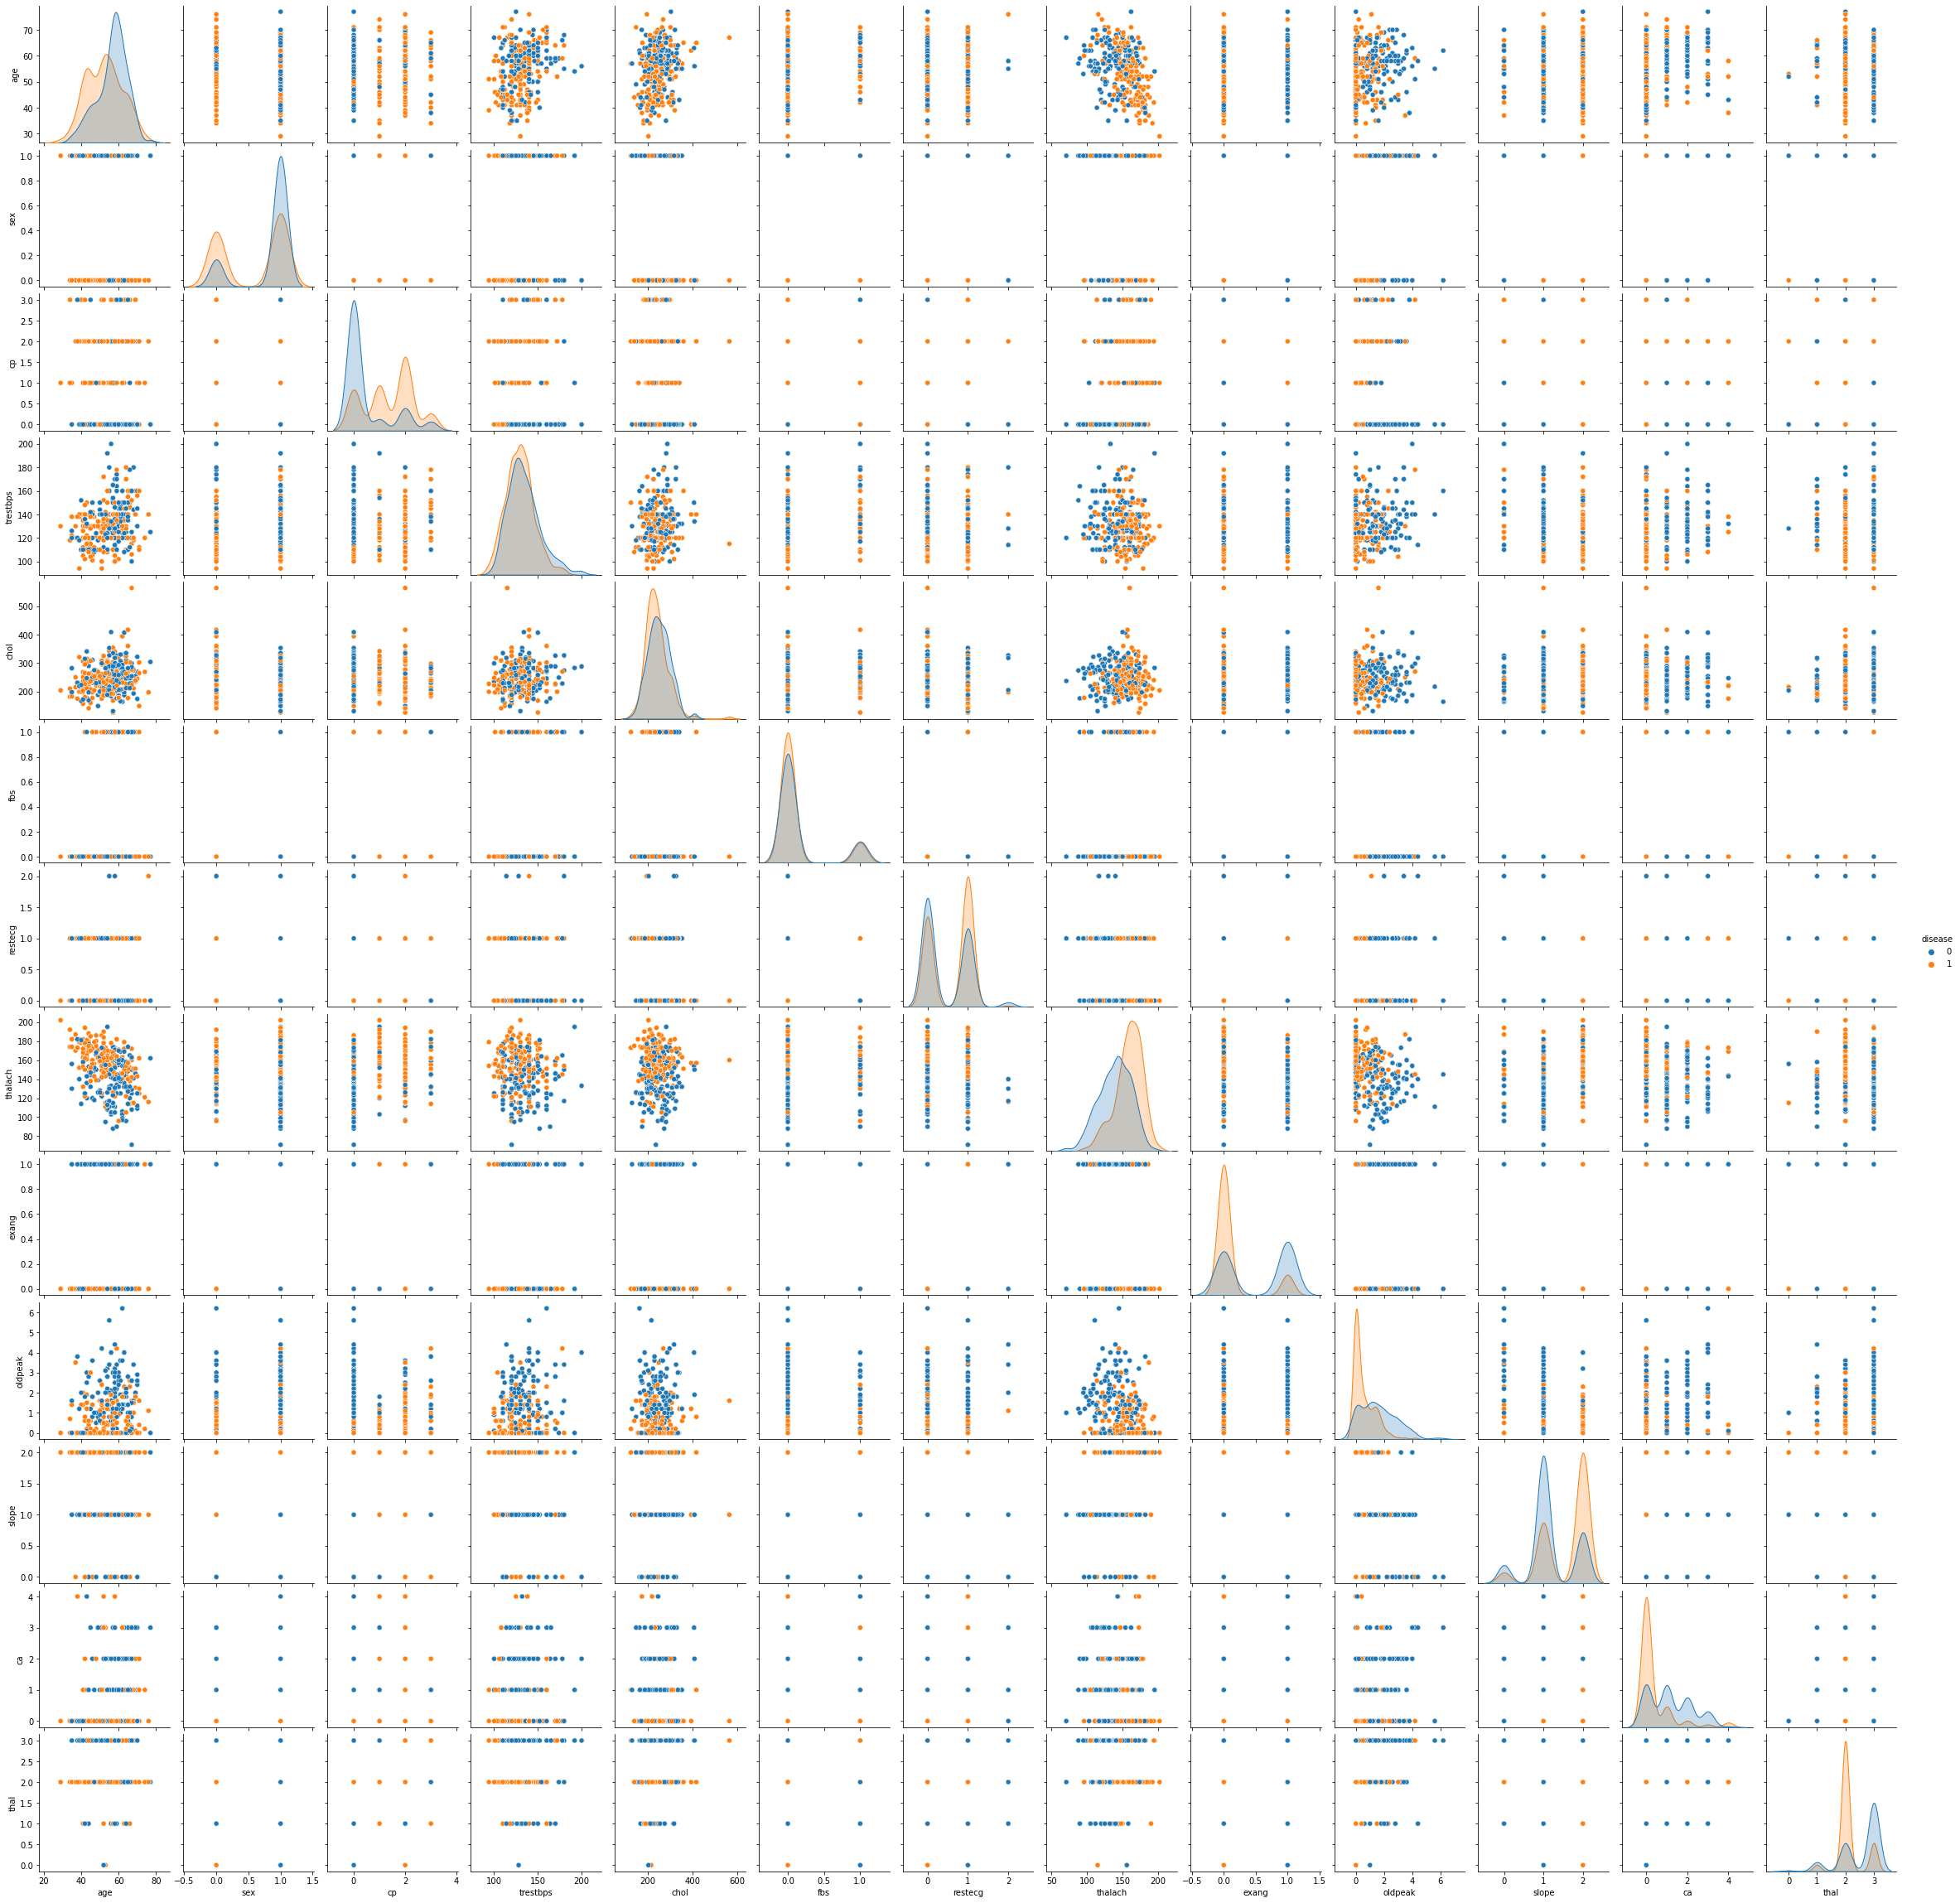

In [16]:
sns.pairplot(heart,hue='disease')

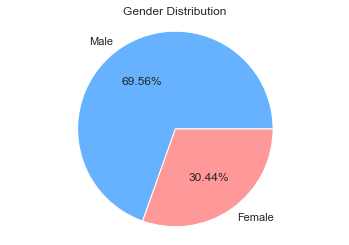

In [38]:
gender_counts = heart['sex'].value_counts()

# Create a pie chart
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%.2f%%', colors=['#66B2FF','#FF9999'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is circular.

plt.show()

Pie chart showing the percentage of male patients vs female

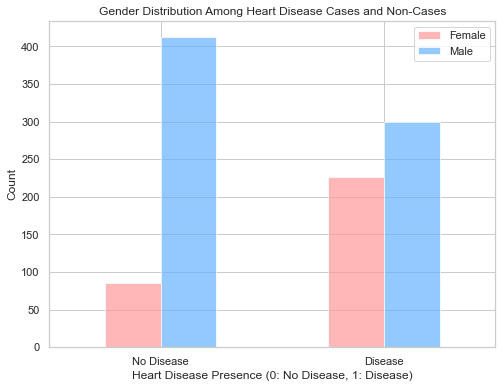

In [28]:

# Count the number of males and females in heart disease cases and non-cases
gender_counts = heart.groupby(['disease', 'sex'])['sex'].count().unstack()

# Create a bar plot
gender_counts.plot(kind='bar', color=['#FF9999', '#66B2FF'], alpha=0.7, figsize=(8, 6))
plt.title('Gender Distribution Among Heart Disease Cases and Non-Cases')
plt.xlabel('Heart Disease Presence (0: No Disease, 1: Disease)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease', 'Disease'], rotation=0)
plt.legend(['Female', 'Male'])

plt.show()



There is a clear difference in the gender distribution between heart disease cases and non-cases.
Males (coded as 1) are more likely to have heart disease than females (coded as 0). This suggests that gender may be a significant risk factor for heart disease.

Chi-squared test statistic: 78.86305133922973
P-value: 6.656820681726434e-19


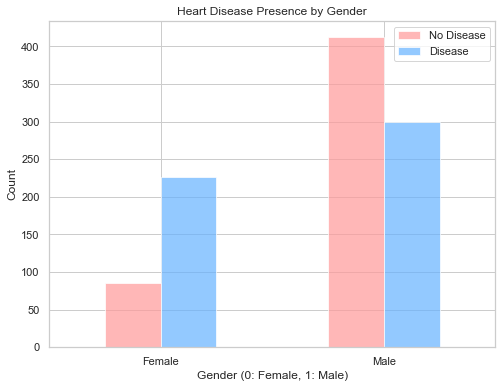

In [30]:
from scipy.stats import chi2_contingency

# Group data by gender and calculate the count of heart disease cases and non-cases
gender_heart_disease = heart.groupby(['sex', 'disease'])['disease'].count().unstack()

# Create a bar plot
gender_heart_disease.plot(kind='bar', color=['#FF9999', '#66B2FF'], alpha=0.7, figsize=(8, 6))
plt.title('Heart Disease Presence by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.legend(['No Disease', 'Disease'])

# Perform a chi-squared test for gender and heart disease presence
chi2, p, _, _ = chi2_contingency(gender_heart_disease)
print(f"Chi-squared test statistic: {chi2}")
print(f"P-value: {p}")

plt.show()


The chi-squared test results suggest that there is a strong and highly statistically significant association between gender and the presence of heart disease. This implies that gender is a significant factor in predicting heart disease, and there is evidence to support the claim that gender is associated with heart disease presence in the dataset.

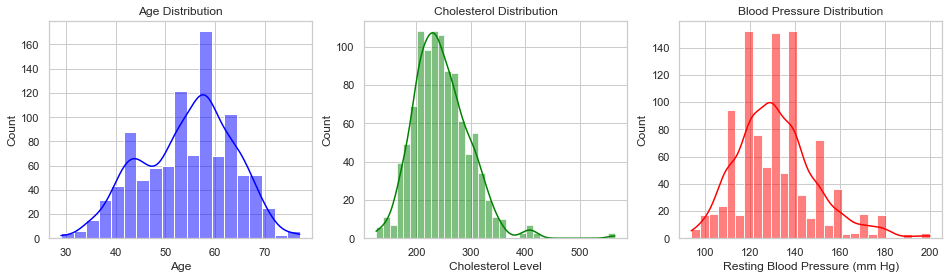

In [22]:
# Set up a grid of subplots for feature distribution visualization
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

# Plot the distribution of age
sns.histplot(heart['age'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')

# Plot the distribution of cholesterol levels
sns.histplot(heart['chol'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Cholesterol Distribution')
axes[1].set_xlabel('Cholesterol Level')

# Plot the distribution of blood pressure (trestbps)
sns.histplot(heart['trestbps'], kde=True, ax=axes[2], color='red')
axes[2].set_title('Blood Pressure Distribution')
axes[2].set_xlabel('Resting Blood Pressure (mm Hg)')

plt.show()


Above creates a grid of subplots to visualize the distribution of age, cholesterol levels, and resting blood pressure. It uses histograms with kernel density estimation (KDE) to provide a smooth representation of the feature distributions. 

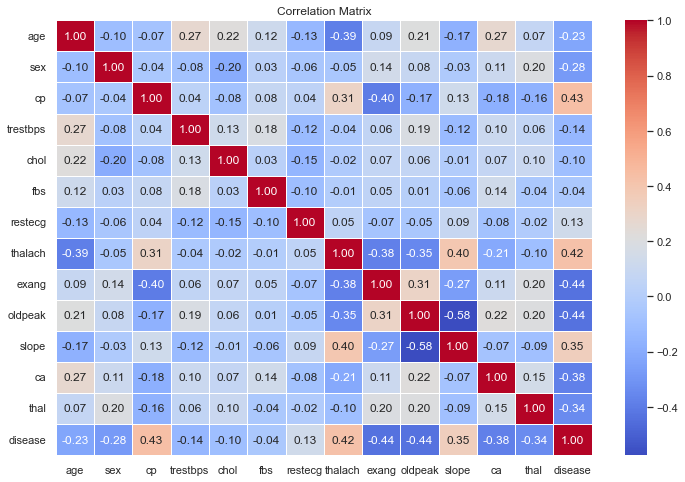

In [41]:
# Calculate the correlation matrix
correlation_matrix = heart.corr()

# Set up the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")

plt.show()

In [24]:
# Extract correlations with "target" feature
correlations_with_target = correlation_matrix['disease']

# Sort the correlations in descending order
sorted_correlations = correlations_with_target.abs().sort_values(ascending=False)

# Display the sorted correlations
print(sorted_correlations)

disease     1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: disease, dtype: float64


These features have the highest absolute correlation coefficients with the "target(disease)" feature, indicating a stronger relationship with heart disease presence. "oldpeak," "exang," and "cp" have the highest correlations and are likely to be the most strongly related features in predicting heart disease.

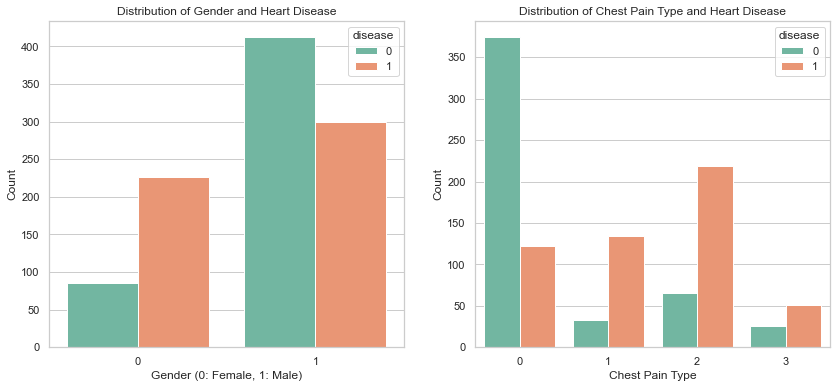

In [25]:
# Set up a grid of subplots for categorical variable analysis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the distribution of "sex" (gender) and its relationship with the target variable
sns.countplot(data=heart, x='sex', hue='disease', ax=axes[0], palette="Set2")
axes[0].set_title('Distribution of Gender and Heart Disease')
axes[0].set_xlabel('Gender (0: Female, 1: Male)')
axes[0].set_ylabel('Count')

# Plot the distribution of "cp" (chest pain type) and its relationship with the target variable
sns.countplot(data=heart, x='cp', hue='disease', ax=axes[1], palette="Set2")
axes[1].set_title('Distribution of Chest Pain Type and Heart Disease')
axes[1].set_xlabel('Chest Pain Type')
axes[1].set_ylabel('Count')

plt.show()


Chi-squared test statistic: 280.98224857035257
P-value: 1.2980664694820452e-60


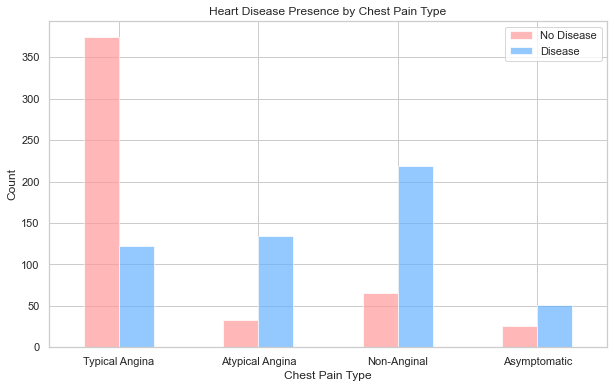

In [31]:
# Group data by chest pain type and calculate the count of heart disease cases and non-cases
cp_heart_disease = heart.groupby(['cp', 'disease'])['disease'].count().unstack()

# Create a bar plot
cp_heart_disease.plot(kind='bar', color=['#FF9999', '#66B2FF'], alpha=0.7, figsize=(10, 6))
plt.title('Heart Disease Presence by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['Typical Angina', 'Atypical Angina', 'Non-Anginal', 'Asymptomatic'], rotation=0)
plt.legend(['No Disease', 'Disease'])

# Perform a chi-squared test for chest pain type and heart disease presence
chi2, p, _, _ = chi2_contingency(cp_heart_disease)
print(f"Chi-squared test statistic: {chi2}")
print(f"P-value: {p}")

plt.show()


This implies that chest pain type is a significant factor in predicting heart disease, and there is substantial evidence supporting the claim that chest pain type is associated with heart disease presence in the dataset.

The type of chest pain (cp) experienced by individuals is associated with heart disease presence.
Certain chest pain types, such as "Atypical Angina" and "Non-Anginal," are more strongly associated with heart disease than others.

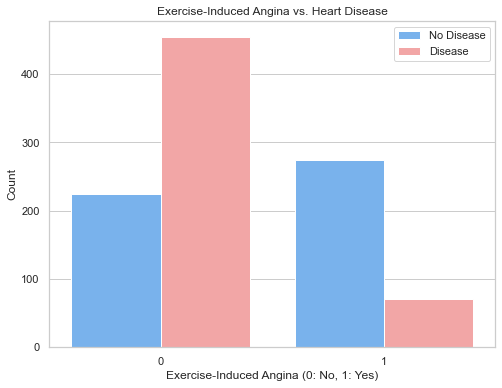

In [36]:
# Create a count plot to visualize the distribution of exercise-induced angina by heart disease presence
plt.figure(figsize=(8, 6))
sns.countplot(data=heart, x='exang', hue='disease', palette=['#66B2FF', '#FF9999'])
plt.title('Exercise-Induced Angina vs. Heart Disease')
plt.xlabel('Exercise-Induced Angina (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])

plt.show()


For individuals with heart disease (red bars), the count of exercise-induced angina (exang = 1) appears lower compared to those without exercise-induced angina (exang = 0).
For individuals without heart disease (blue bars), the count of exercise-induced angina (exang = 1) is noticeably higher than those without exercise-induced angina (exang = 0).

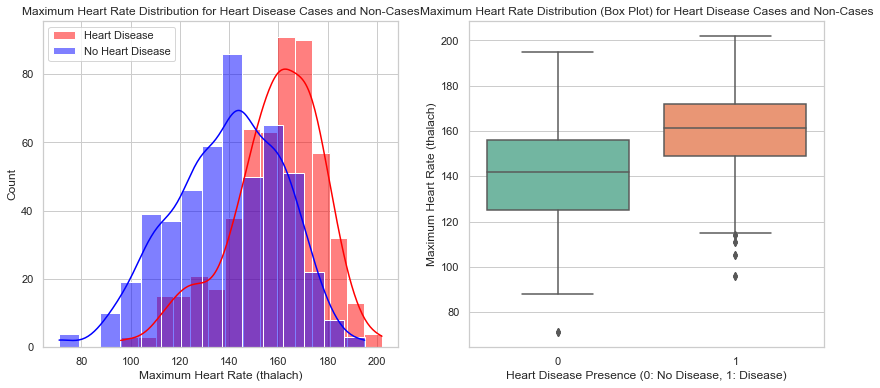

In [33]:

# Set up a grid of subplots for EDA
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot histograms of maximum heart rate for heart disease cases and non-cases
sns.histplot(heart[heart['disease'] == 1]['thalach'], kde=True, color='red', ax=axes[0], label='Heart Disease', bins=15)
sns.histplot(heart[heart['disease'] == 0]['thalach'], kde=True, color='blue', ax=axes[0], label='No Heart Disease', bins=15)
axes[0].set_title('Maximum Heart Rate Distribution for Heart Disease Cases and Non-Cases')
axes[0].set_xlabel('Maximum Heart Rate (thalach)')
axes[0].set_ylabel('Count')
axes[0].legend()

# Plot box plots of maximum heart rate for heart disease cases and non-cases
sns.boxplot(x='disease', y='thalach', data=heart, palette='Set2', ax=axes[1])
axes[1].set_title('Maximum Heart Rate Distribution (Box Plot) for Heart Disease Cases and Non-Cases')
axes[1].set_xlabel('Heart Disease Presence (0: No Disease, 1: Disease)')
axes[1].set_ylabel('Maximum Heart Rate (thalach)')

plt.show()


The plot indicates that individuals with heart disease tend to achieve lower maximum heart rates (thalach) during stress tests, while those without heart disease achieve higher maximum heart rates, suggesting a potential association between lower maximum heart rate and heart disease presence.

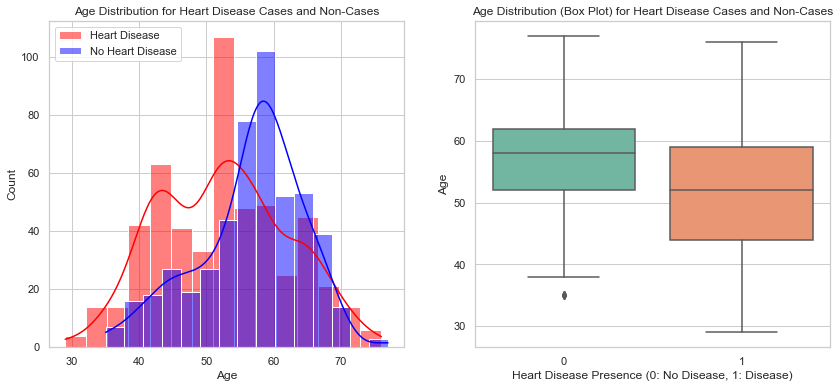

In [26]:

# Set up a grid of subplots for age distribution visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot histograms of age for heart disease cases and non-cases
sns.histplot(heart[heart['disease'] == 1]['age'], kde=True, color='red', ax=axes[0], label='Heart Disease', bins=15)
sns.histplot(heart[heart['disease'] == 0]['age'], kde=True, color='blue', ax=axes[0], label='No Heart Disease', bins=15)
axes[0].set_title('Age Distribution for Heart Disease Cases and Non-Cases')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].legend()

# Plot box plots of age for heart disease cases and non-cases
sns.boxplot(x='disease', y='age', data=heart, palette='Set2', ax=axes[1])
axes[1].set_title('Age Distribution (Box Plot) for Heart Disease Cases and Non-Cases')
axes[1].set_xlabel('Heart Disease Presence (0: No Disease, 1: Disease)')
axes[1].set_ylabel('Age')

plt.show()


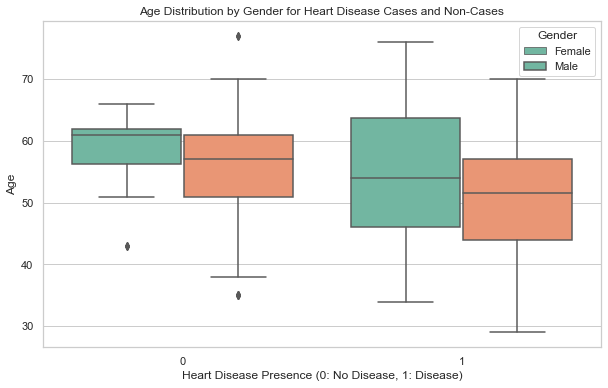

In [29]:

# Create a box plot to compare age distributions
plt.figure(figsize=(10, 6))
sns.boxplot(x='disease', y='age', hue='sex', data=heart, palette="Set2")
plt.title('Age Distribution by Gender for Heart Disease Cases and Non-Cases')
plt.xlabel('Heart Disease Presence (0: No Disease, 1: Disease)')
plt.ylabel('Age')
plt.legend(title='Gender', labels=['Female', 'Male'])

plt.show()


Age is an important factor in heart disease. As age increases, the likelihood of heart disease also increases.
There is a clear age difference between heart disease cases and non-cases. Heart disease is more prevalent in older individuals.